In [5]:
import numpy as np
from matplotlib import pyplot as plt
import json, os

In [6]:
run = 1
invgamma0 = 40.0
rhoseed = 50 
epsilon=0.4
alpha = -0.1
chi = 1.2
lambd = 1.0
KQ = 1.0
rhocluster=180
rhobg=15
ncluster=16
ddir = '/data'
model =  '/cluster/model_anisotropic_friction'

pdir = '../'+ddir+model+'/ncluster_{:d}_rhocluster_{:1.0f}_rhobg_{:1.0f}/invgamma0_{:1.1f}_rhoseed_{:1.2f}_KQ_{:1.1f}/epsilon_{:1.1f}_alpha_{:1.2f}_chi_{:1.2f}_lambda_{:.1f}/run_{:d}/'.format(ncluster, rhocluster, rhobg, invgamma0, rhoseed, KQ, epsilon, alpha, chi, lambd, run)

datadir = pdir+'data/'

with open(pdir+'parameters.json') as jsonFile:
    parameters = json.load(jsonFile)

T         = parameters["T"]        # final time
dt_dump   = parameters["dt_dump"]
n_steps   = int(parameters["n_steps"])  # number of time steps
n_dump = int(T/dt_dump); dn_dump = int(n_steps/n_dump)
K         = parameters["K"]        # elastic constant, sets diffusion lengthscale of S with Gamma0
rho_in    = parameters["rho_in"]   # isotropic to nematic transition density, or "onset of order in the paper"
rhoisoend = parameters["rhoisoend"] /rho_in   # jamming density
rhonemend = parameters["rhonemend"] /rho_in   # jamming density max for nematic substrate
mx        = np.int32(parameters["mx"])
my        = np.int32(parameters["my"])
dx        = np.float32(parameters["dx"])
dy        = np.float32(parameters["dy"])
#setup a meshgrid
tol = 0.001

x   = np.linspace(0+tol, 1-tol, mx)
y   = np.linspace(0+tol, 1-tol, my)
xv, yv  = np.meshgrid(x,y, indexing='ij')


times = np.arange(0, n_dump, 1)*dt_dump

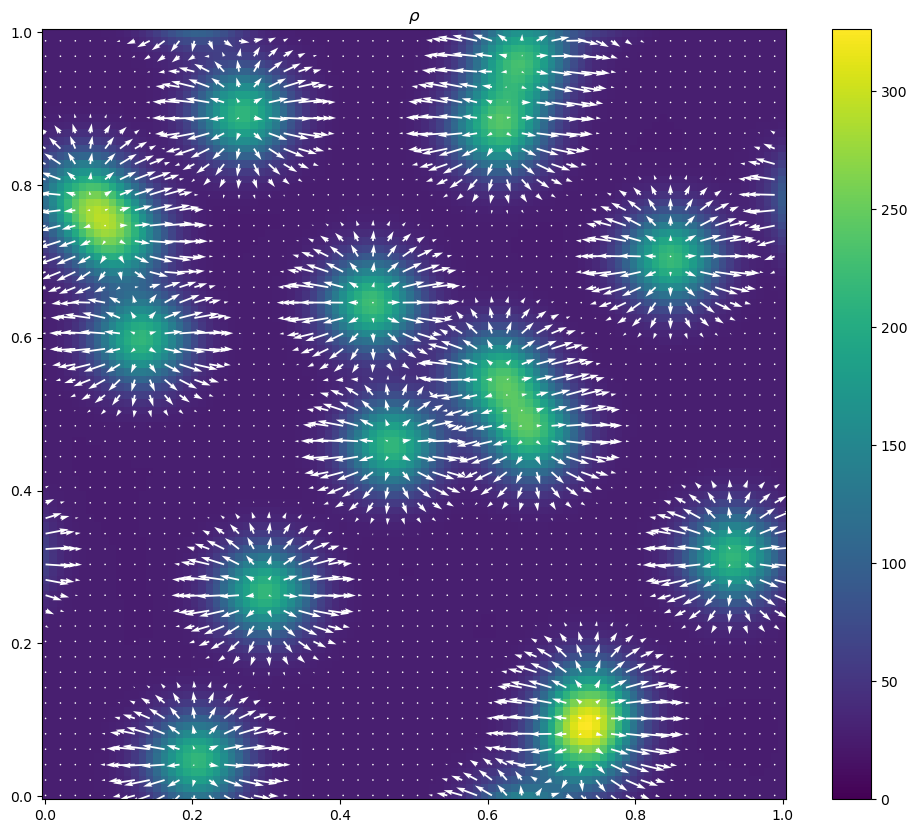

In [7]:
from matplotlib.colors import LinearSegmentedColormap

fig, ax=plt.subplots(figsize=(12,10))

n=2

field = np.loadtxt(datadir+'rho.csv.{:d}'.format(n), delimiter=',')*rho_in
Qx = np.loadtxt(datadir+'Qxx.csv.{:d}'.format(n), delimiter=',')  
Qy = np.loadtxt(datadir+'Qxy.csv.{:d}'.format(n), delimiter=',')
S2 = (Qx**2 + Qy**2)*4
vx = np.loadtxt(datadir+'vx.csv.{:d}'.format(n), delimiter=',')
vy = np.loadtxt(datadir+'vy.csv.{:d}'.format(n), delimiter=',')

p_factor = np.max([1,np.int32(mx/39)])

ctrf = [ax.pcolormesh(xv, yv, field, vmin=0, vmax=np.max(field)), ax.quiver(xv[::p_factor, ::p_factor], yv[::p_factor, ::p_factor], vx[::p_factor, ::p_factor], vy[::p_factor, ::p_factor], color='w')]
plt.colorbar(ctrf[0])
plt.title(r"$\rho$")
plt.show()

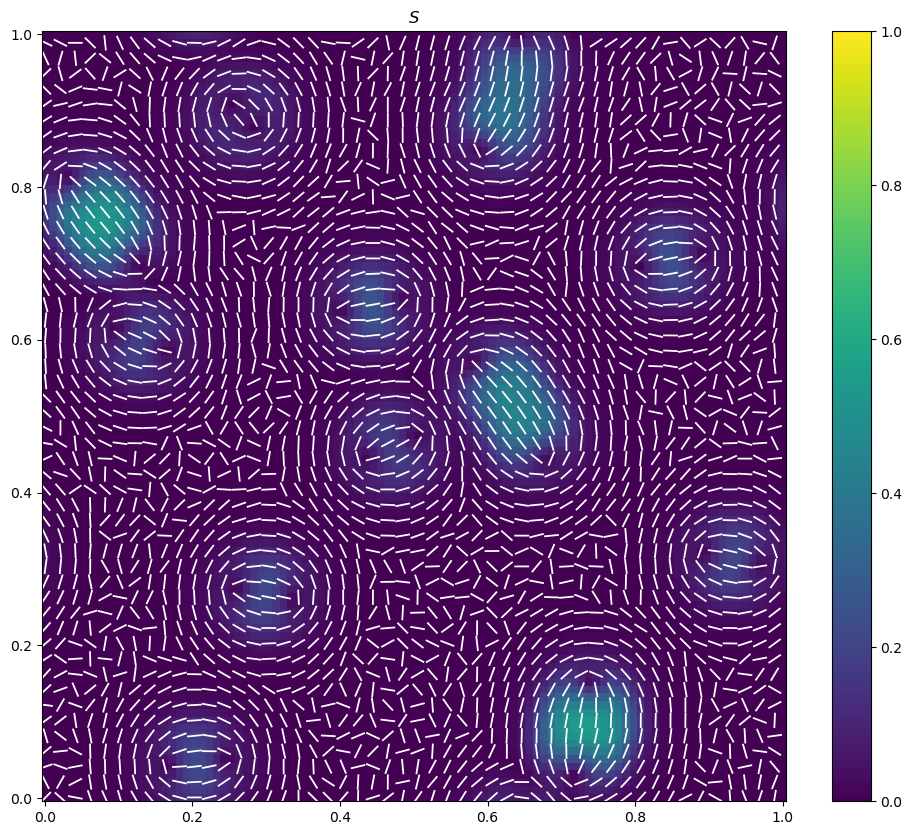

In [8]:
fig, ax=plt.subplots(figsize=(12,10))

n=2

rho = np.loadtxt(datadir+'rho.csv.{:d}'.format(n), delimiter=',')
Qxx = np.loadtxt(datadir+'Qxx.csv.{:d}'.format(n), delimiter=',')
Qxy = np.loadtxt(datadir+'Qxy.csv.{:d}'.format(n), delimiter=',')
S = 2*np.sqrt(Qxx**2+Qxy**2)

p_factor = np.max([np.int32(mx/38),1])
theta = np.arctan2(Qxy, Qxx)/2
Snx    = np.cos(theta)
Sny    = np.sin(theta)

plot1 = [ax.pcolormesh(xv, yv, S, cmap='viridis', vmin=0, vmax=1), ax.quiver(xv[::p_factor, ::p_factor], yv[::p_factor, ::p_factor], Snx[::p_factor, ::p_factor], Sny[::p_factor, ::p_factor], color='w', pivot='middle', headlength=0, headaxislength=0, scale=50, scale_units='xy')]

fig.colorbar(plot1[0], ax=ax)
ax.set_title(r"$ S $")
plt.show()

### 